# Sportswear Retailer Sales Analysis Project

***

## Introduction 

This is a sales data analysis portfolio project of Adidas US Sales datset. The dataset used for the analysis is downloaded from kaggle website(kaggle.com). In this project, I will try to do basic data analysis to figure out the strengths and weakness in the sales operation. Also, I will provide this analysis with visualizations to make clear of results. 

Data is in tabular format(.csv file) of 13 columns and 9648 records. Those columns are:
Retailer, Retailer ID, InvoiceDate, Region, State, City, Product, Price per Unit, Units Sold,
TotalSales, Operating Profit, Operating Margin Percentage, Sales Method.


In the beginning, let's import some libraries which I will be using in the Analysis, then pull the dataset file(.csv file) "adidas_us_sales.csv" into python and store it in a dataframe named "Adidas_Sales" using pandas library.

In [1]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns 

import plotly.express as px
from datetime import datetime, timedelta
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
    """)


In [2]:
# importing google drive for google colab
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# store data into pandas dataframe
Adidas_Sales = pd.read_csv('Data/adidas_us_sales.csv')


***

## Exploratory Data Analysis (EDA)

In [4]:
# data preview 
Adidas_Sales.head() 


,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage,Sales Method
0,Foot Locker,1185732,1-Jan-20,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2-Jan-20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,3-Jan-20,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,4-Jan-20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,5-Jan-20,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
Adidas_Sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Retailer                     9648 non-null   object 
 1   Retailer ID                  9648 non-null   int64  
 2   InvoiceDate                  9648 non-null   object 
 3   Region                       9648 non-null   object 
 4   State                        9648 non-null   object 
 5   City                         9648 non-null   object 
 6   Product                      9648 non-null   object 
 7   Price per Unit               9648 non-null   float64
 8   Units Sold                   9648 non-null   int64  
 9   TotalSales                   9648 non-null   float64
 10  Operating Profit             9648 non-null   float64
 11  Operating Margin Percentage  9648 non-null   float64
 12  Sales Method                 9648 non-null   object 
dtypes: float64(4), int

<br>
As shown in the above cell, we have 6 columns with numerical data and their data types are 
defined perfectly, and 6 columns with text data their types are defined perfectly. 
however, There is one column that represent dates, so it will be converted from object to date in data preperation step.

In [6]:
# nulls
Adidas_Sales.isnull().sum(axis = 'rows')


Retailer                       0
Retailer ID                    0
InvoiceDate                    0
Region                         0
State                          0
City                           0
Product                        0
Price per Unit                 0
Units Sold                     0
TotalSales                     0
Operating Profit               0
Operating Margin Percentage    0
Sales Method                   0
dtype: int64

Now, let's explore some columns.

In [7]:
# Retailer 
Adidas_Sales['Retailer'].unique()       # 6 Retailers


array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

In [8]:
# Retailer ID
Adidas_Sales['Retailer ID'].unique()    # 4 Retailer IDs


array([1185732, 1197831, 1128299, 1189833], dtype=int64)

We have 6 Retailers, but only 4 Retailer IDs, so we may have 2 scenarios:
1. There are some Retailers have no Retailer ID, i.e: Null Retailer ID.
2. There are more than one retailer that share the same Retailer ID. 
<br>

As the dataset has no nulls! It will be the second scenario.
Let's examine this and find the Retailers which are sharing same Retailer ID..

In [9]:
# Retailers sharing same Retailer ID
pd.concat([
    Adidas_Sales[Adidas_Sales['Retailer'] == 'Foot Locker'].head(1),
    Adidas_Sales[Adidas_Sales['Retailer'] == 'Walmart'].head(1),
    Adidas_Sales[Adidas_Sales['Retailer'] == 'Amazon'].head(1),
    Adidas_Sales[Adidas_Sales['Retailer'] == 'Sports Direct'].head(1),
    Adidas_Sales[Adidas_Sales['Retailer'] == 'West Gear'].head(1),
    Adidas_Sales[Adidas_Sales['Retailer'] == "Kohl's"].head(1)
])


,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage,Sales Method
0,Foot Locker,1185732,1-Jan-20,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
46,Walmart,1185732,17-Apr-20,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,Outlet
1148,Amazon,1185732,12-Oct-21,South,Alabama,Birmingham,Men's Street Footwear,40.0,450,180000.0,63000.0,0.35,Outlet
68,Sports Direct,1197831,19-Jul-20,Northeast,New York,New York,Men's Street Footwear,25.0,900,225000.0,78750.0,0.35,Outlet
140,West Gear,1128299,1-Nov-20,South,Texas,Houston,Men's Street Footwear,40.0,775,310000.0,108500.0,0.35,Outlet
212,Kohl's,1189833,17-Feb-21,West,California,San Francisco,Men's Street Footwear,35.0,700,245000.0,98000.0,0.40,Outlet


Result show that:


| Retailer      |    Retailer ID |
|:--------------|:---------------|
|Foot Locker    |   1185732      |
|Walmart        |   1185732      |
|Amazon         |   1185732      |
|Sports Direct  |   1197831      |
|West Gear      |   1128299      |
|Kohl's         |   1189833      |

We have 3 Retailers share the same Retailer ID: <br>
Foot Locker, Walmart, Amazon $\longrightarrow$  1185732

As a result, we cannot use Retailer ID Values to represent distinct Retailers in the analysis.

Let's explore the other columns.

In [10]:
# Region
Adidas_Sales['Region'].value_counts()


Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [11]:
# State
Adidas_Sales['State'].value_counts()
                       

State
California        432
Texas             432
New York          360
Florida           360
Mississippi       216
Oregon            216
Louisiana         216
Idaho             216
New Mexico        216
Georgia           216
Arkansas          216
Virginia          216
Oklahoma          216
Connecticut       216
Rhode Island      216
Massachusetts     216
Vermont           216
Utah              216
Arizona           216
New Hampshire     216
Pennsylvania      216
Nevada            216
Alabama           216
Tennessee         216
South Dakota      144
Illinois          144
Colorado          144
New Jersey        144
Delaware          144
Maryland          144
West Virginia     144
Indiana           144
Wisconsin         144
Iowa              144
North Dakota      144
Michigan          144
Kansas            144
Missouri          144
Minnesota         144
Montana           144
Kentucky          144
Ohio              144
North Carolina    144
South Carolina    144
Nebraska          144
Main

In [12]:
# City
Adidas_Sales['City'].value_counts()


City
Portland          360
Charleston        288
Orlando           216
Salt Lake City    216
Houston           216
Boise             216
Phoenix           216
Albuquerque       216
Atlanta           216
New York          216
Jackson           216
Little Rock       216
Oklahoma City     216
Hartford          216
Providence        216
Boston            216
Burlington        216
Richmond          216
New Orleans       216
Manchester        216
Dallas            216
Philadelphia      216
Knoxville         216
Birmingham        216
Las Vegas         216
Los Angeles       216
San Francisco     216
Chicago           144
Newark            144
Baltimore         144
Indianapolis      144
Milwaukee         144
Des Moines        144
Fargo             144
Sioux Falls       144
Wichita           144
Wilmington        144
Honolulu          144
Albany            144
Louisville        144
Columbus          144
Charlotte         144
Seattle           144
Miami             144
Minneapolis       144
Billi

In [13]:
# Product
Adidas_Sales['Product'].value_counts()


Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

***

## Data Preperation

In [14]:
Adidas_Sales.shape


(9648, 13)

In [15]:
# duplicates
Adidas_Sales = Adidas_Sales.drop_duplicates()
Adidas_Sales.shape


(9648, 13)

In [16]:
# convert InvoiceDate column data type to datetime 
Adidas_Sales['InvoiceDate'] = pd.to_datetime(Adidas_Sales['InvoiceDate'])
Adidas_Sales['InvoiceDate'].dtype


C:\Users\MOHAMED_ALAA\AppData\Local\Temp\ipykernel_6396\2221322166.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Adidas_Sales['InvoiceDate'] = pd.to_datetime(Adidas_Sales['InvoiceDate'])


dtype('<M8[ns]')

In [17]:
# Sales Method
Adidas_Sales['Sales Method'].value_counts()


Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

In [18]:
# InvoiceDate 
print('Start Date     ', datetime.date(min(Adidas_Sales['InvoiceDate'])))
print('End Date       ', datetime.date(max(Adidas_Sales['InvoiceDate'])))
print('Count of Days  ', (max(Adidas_Sales['InvoiceDate'])-min(Adidas_Sales['InvoiceDate'])).days)


Start Date      2020-01-01
End Date        2021-12-31
Count of Days   730


In [19]:
# Adidas_Sales.to_csv('adidas_us_sales_model_ready_data.csv', index = False)


***

## Data Analysis

In [20]:
# TotalSales by State
df0 = pd.DataFrame(Adidas_Sales.groupby('State')['TotalSales'].sum())
df0 = df0.sort_values(by = 'TotalSales', ascending = False)
df0.transpose()


State,New York,California,Florida,Texas,South Carolina,Washington,North Carolina,Louisiana,Hawaii,Virginia,...,Maine,Indiana,South Dakota,Rhode Island,Maryland,North Dakota,Wisconsin,Iowa,Minnesota,Nebraska
TotalSales,64229039.0,60174133.0,59283714.0,46359746.0,29285637.0,26330718.0,23956531.0,23750781.0,22282457.0,21575040.0,...,9195978.0,8836198.0,8495576.0,8446806.0,7758059.0,7735580.0,7727469.0,7424011.0,7378068.0,5929038.0


In [21]:
# TotalSales by City
df1 = pd.DataFrame(Adidas_Sales.groupby('City')['TotalSales'].sum())
df1 = df1.sort_values(by = 'TotalSales', ascending = False)
df1.transpose()


City,Charleston,New York,San Francisco,Miami,Portland,Orlando,Seattle,Los Angeles,Houston,Albany,...,St. Louis,Indianapolis,Sioux Falls,Providence,Baltimore,Fargo,Milwaukee,Des Moines,Minneapolis,Omaha
TotalSales,39974797.0,39801235.0,34539220.0,31600863.0,30545652.0,27682851.0,26330718.0,25634913.0,25456882.0,24427804.0,...,9683265.0,8836198.0,8495576.0,8446806.0,7758059.0,7735580.0,7727469.0,7424011.0,7378068.0,5929038.0


In [22]:
Adidas_Sales

,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1378.0,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.0,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1235.0,0.42,Outlet


Let's apply correlation concept to numerical column data and see how they are affecting each other.

In [23]:
# extract numerical columns
categ_columns = ['InvoiceDate']

for col in Adidas_Sales.columns:
    if Adidas_Sales[col].dtype == 'object':
        categ_columns.append(str(col))

df2 = Adidas_Sales.drop(columns = categ_columns)
df2.head()


,Retailer ID,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage
0,1185732,50.0,1200,600000.0,300000.0,0.50
1,1185732,50.0,1000,500000.0,150000.0,0.30
2,1185732,40.0,1000,400000.0,140000.0,0.35
3,1185732,45.0,850,382500.0,133875.0,0.35
4,1185732,60.0,900,540000.0,162000.0,0.30


In [24]:
# defining correlation matrix
Corr_Mat = df2.corr(method = 'pearson')
Corr_Mat


,Retailer ID,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
TotalSales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211921
Operating Margin Percentage,0.216780,-0.137486,-0.305479,-0.364592,-0.211921,1.000000


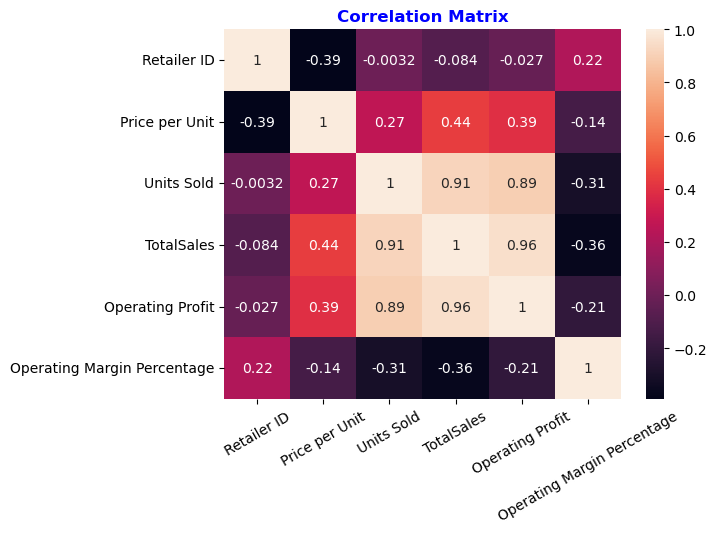

In [26]:
# present correlation matrix as heatmap
sns.heatmap(Corr_Mat, annot = True)
plt.title('Correlation Matrix', size = 12, color = 'blue', weight = 'bold')
plt.xticks(rotation = 30)
plt.yticks(rotation = 0)
plt.show()


Let's explore some numbers in this correlation matrix and see how the relation between columns are affected. <br> 

- Price per Unit V Units Sold $\longrightarrow$ 0.27
- Price per Unit V TotalSales $\longrightarrow$ 0.44
- Units Sold V TotalSales $\longrightarrow$ 0.91
- TotalSales V Operating Profit $\longrightarrow$ 0.96
- TotalSales V Operating Margin Percentage $\longrightarrow$ -0.36
- Operating Profit V Operating Margin Percentage $\longrightarrow$ -0.21


***

### Data Visualization

Let's begin by display the total sales of each retailer to see which retailer has the highest sales amount and which retailer has the lowest sales and that needs to be improved.

In [46]:
# Retailer V Total Sales
Adidas_Sales.groupby('Retailer')['TotalSales'].sum()


Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: TotalSales, dtype: float64

let's plot this result.

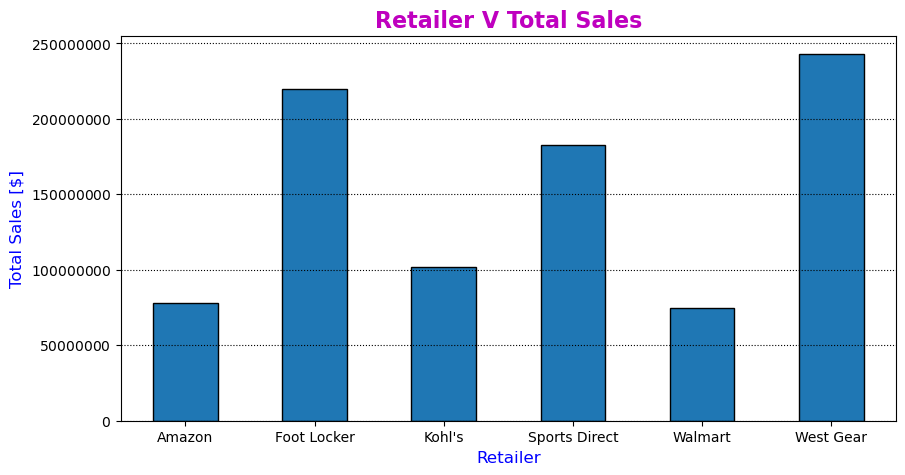

In [46]:
# Retailer V TotalSales
plt.figure(figsize = (10,5))
Adidas_Sales.groupby('Retailer')['TotalSales'].sum().plot(kind = 'bar', edgecolor = 'k')
plt.title('Retailer V Total Sales', size = 16, color = 'm', weight = 'bold')
plt.xlabel('Retailer', color = 'b', size = 12)
plt.ylabel('Total Sales [$]', color = 'b', size = 12)
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid(axis = 'y', linestyle = ':', color = 'black')
plt.show()


It's obvious from chart above, West Gear and Foot Locker are dominating the sales, on the contrary 
Amazon and Walmart have the lowest sales amount.

***

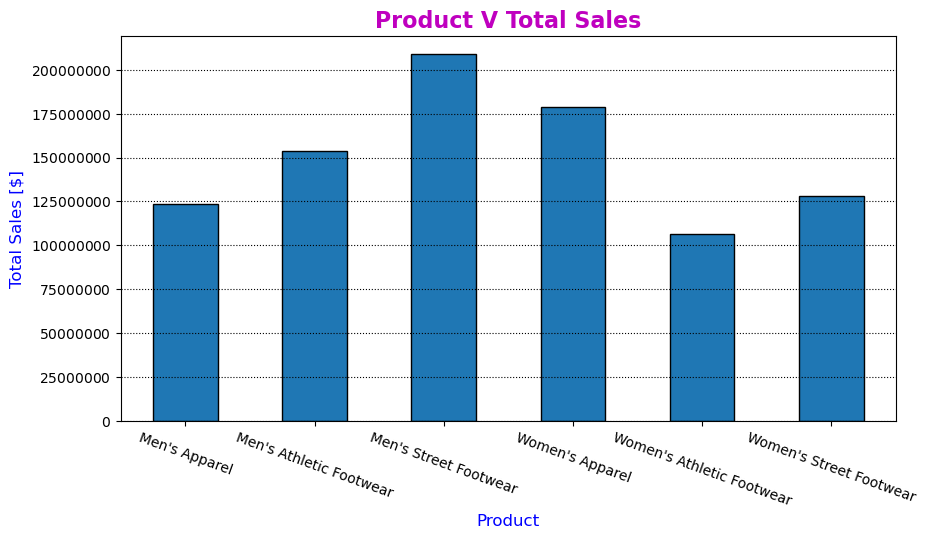

In [47]:
# Product V Total Sales
plt.figure(figsize = (10,5))
Adidas_Sales.groupby('Product')['TotalSales'].sum().plot(kind = 'bar', edgecolor = 'black')
plt.title('Product V Total Sales', size = 16, color = 'm', weight = 'bold')
plt.xlabel('Product', color = 'b', size = 12)
plt.ylabel('Total Sales [$]', color = 'b', size = 12)
plt.xticks(rotation = -20)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid(axis = 'y', linestyle = ':', color = 'black')
plt.show()


Let's display the share percentage of each product type.

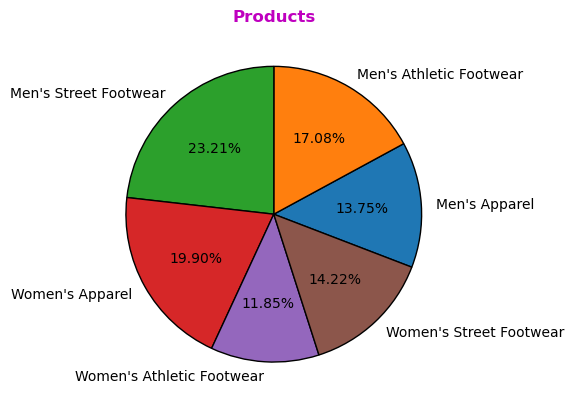

In [55]:
# Different Products share in Sales
Adidas_Sales.groupby('Product')['TotalSales'].sum().plot(
    kind = 'pie', autopct = '%1.2f%%', startangle = -21, wedgeprops = {'edgecolor': 'black'}
)

plt.ylabel("")
plt.title("Products", color = 'm', weight = 'bold')
plt.show()


Now, I'm going to check the total sales by different regions.

In [48]:
# TotalSales by Region
Adidas_Sales.groupby('Region')['TotalSales'].sum()


Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: TotalSales, dtype: float64

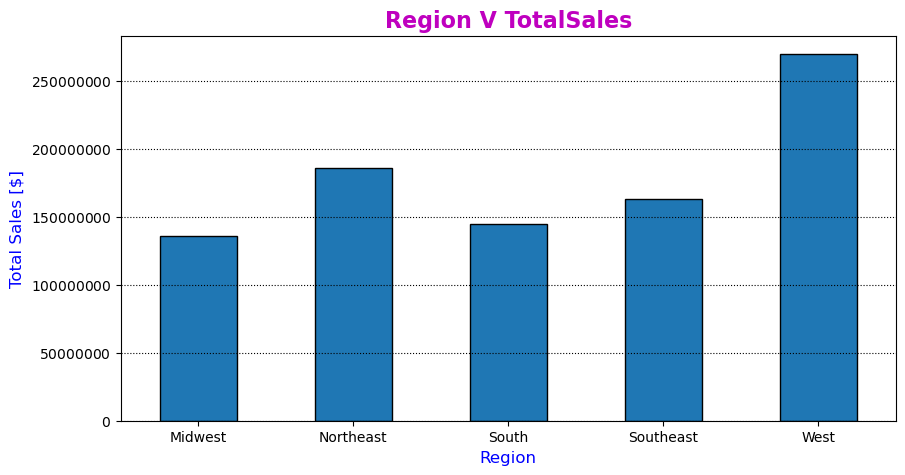

In [49]:
# Region V TotalSales 
plt.figure(figsize = (10,5))
Adidas_Sales.groupby('Region')['TotalSales'].sum().plot(kind = 'bar', edgecolor = 'k')
plt.title('Region V TotalSales', size = 16, color = 'm', weight = 'bold')
plt.xlabel('Region', color = 'b', size = 12)
plt.ylabel('Total Sales [$]', color = 'b', size = 12)
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid(axis = 'y', linestyle = ':', color = 'black')
plt.show()


West Region has the highest sales amount, and Midwest Region has the least sales amount.

Let's visualize total sales and operating profit over time.

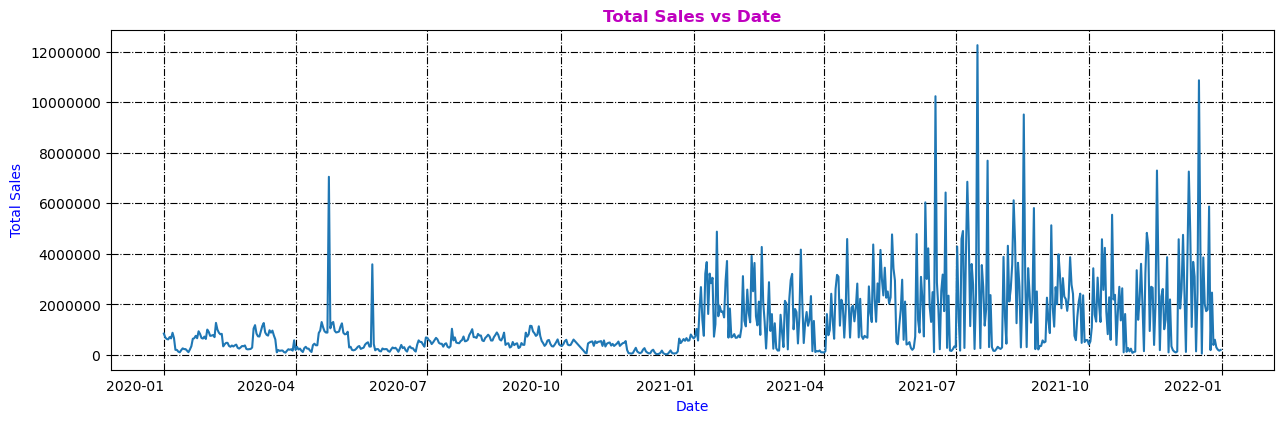

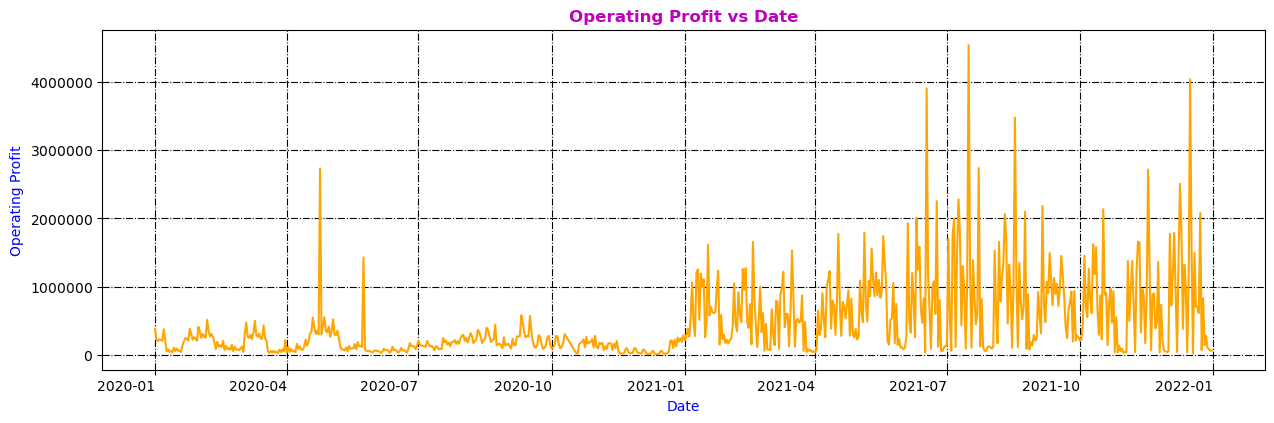

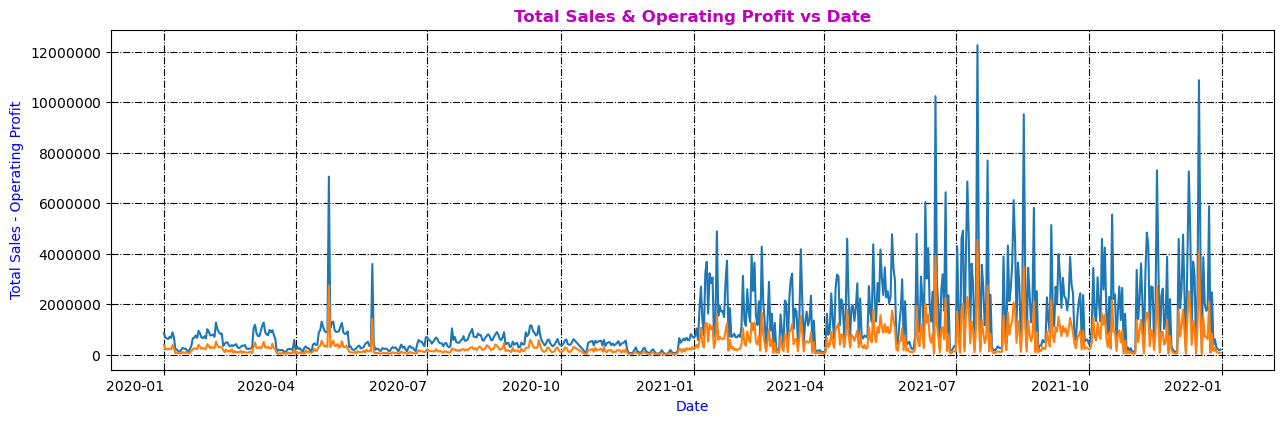

In [50]:
# TotalSales by Invoice Date

plt.figure(figsize = (15,5))
Adidas_Sales.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
plt.title('Total Sales vs Date', color = 'm', weight = 'bold')
plt.xlabel('Date', color = 'b')
plt.ylabel('Total Sales', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()

# Operating Profit by Invoice Date

plt.figure(figsize = (15,5))
Adidas_Sales.groupby('InvoiceDate')['Operating Profit'].sum().plot(kind = 'line', color = 'orange')
plt.title('Operating Profit vs Date', color = 'm', weight = 'bold')
plt.xlabel('Date', color = 'b')
plt.ylabel('Operating Profit', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()

# comparing TotalSales and Operating Profit

plt.figure(figsize = (15,5))
Adidas_Sales.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
Adidas_Sales.groupby('InvoiceDate')['Operating Profit'].sum().plot(kind = 'line')
plt.title('Total Sales & Operating Profit vs Date', color = 'm', weight = 'bold')
plt.xlabel('Date', color = 'b')
plt.ylabel('Total Sales - Operating Profit', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()


The sales amount was low in 2020. However, In 2021, the sales went high espically in the middle of 2021. (June - August). 

Let's see which sales method is the most favourite by customers.

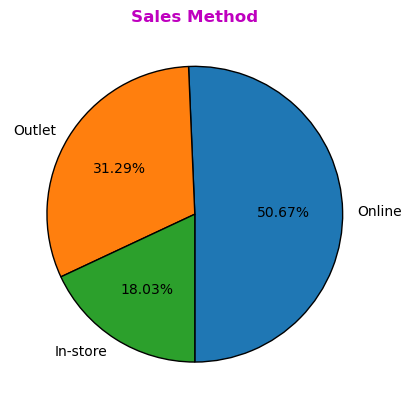

In [54]:
# Sales Method 
Adidas_Sales['Sales Method'].value_counts().plot(
    kind = 'pie', autopct = '%1.2f%%', startangle = 270, wedgeprops = {'edgecolor': 'black'}
)
plt.ylabel("")
plt.title("Sales Method", color = 'm', weight = 'bold')
plt.show()


As shown, Online Sales are having the highest share of Sales Methods.

***

**End of Project**